"사용자 리뷰 데이터 기반 타겟 마케팅 분석" 

In [ ]:
# - AI 모델이 데이터를 학습하려면 깨끗한 데이터가 필요함(결측치,중복데이터, 이상치 제거 )(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("FASION_data/Womens Clothing E-Commerce Reviews.csv") #파일 불러오기 

df.head() #상위 데이터 5개 확인하기

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#데이터 구조 확인 및  결측치 확인
#df.columns #전체 컬럼 확인
#df.info() #데이터 구조 파악

# 'Title', 'Review Text'는 텍스트 데이터로 일부 결측치가 존재하므로 일단 그대로 둠
# 하지만 분석에 사용할 주요 컬럼 중 결측치 많은 건 제거할 수 있음
df = df.dropna(subset=['Rating', 'Class Name'], how ='any')  # 평점과 제품 카테고리는 꼭 있어야 분석 가능(결측치 무조건 제거)
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_15540\682796565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df,palette='coolwarm')


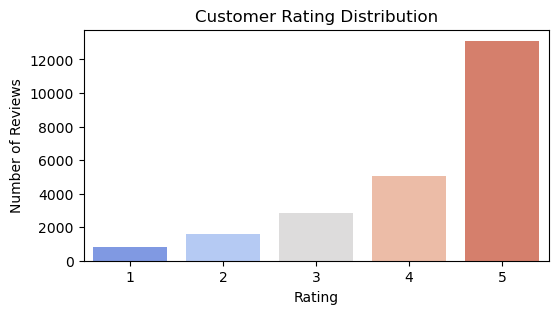

In [156]:
# 평점 빈도 분포 시각화
plt.figure(figsize=(6, 3))
sns.countplot(x='Rating', data=df,palette='coolwarm')
plt.title('Customer Rating Distribution') 
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

#결론 : 5점짜리 평점이 많으므로 만족도가 높은 제품이 많음을 암시할 수 있음

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_18876\4195299986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_rating.values, y=cat_rating.index,palette='RdYlBu')


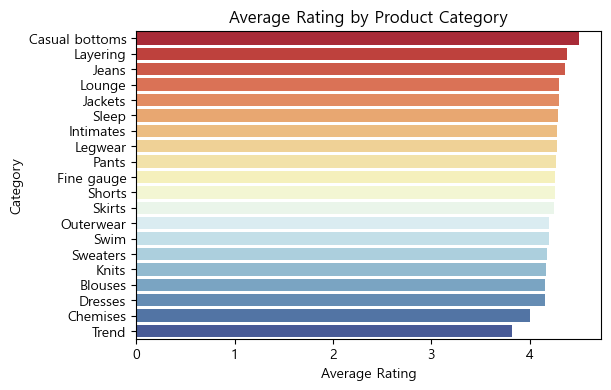

In [59]:
# 카테고리별 평균 평점 계산
cat_rating = df.groupby('Class Name')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=cat_rating.values, y=cat_rating.index,palette='RdYlBu') #'RdYlBu' : 낮은 값은 파랑, 높은 값은 빨강
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')  
plt.ylabel('Category') 
plt.show()

#결론 : 캐주얼 하의(Casual bottoms)이 제일 고객들 만족도 높음 / 추후 도매 플랫품 상품 기확 및 관리의 참고 가능
#그럼 많은 의류중에서 캐주얼 하의가 인기가 많고 좋다고 이해하면 쉬울듯 

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\2046529881.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rating = df.groupby('Age Group')['Rating'].mean()
C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\2046529881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_rating.index, y=age_rating.values, palette='Set2')


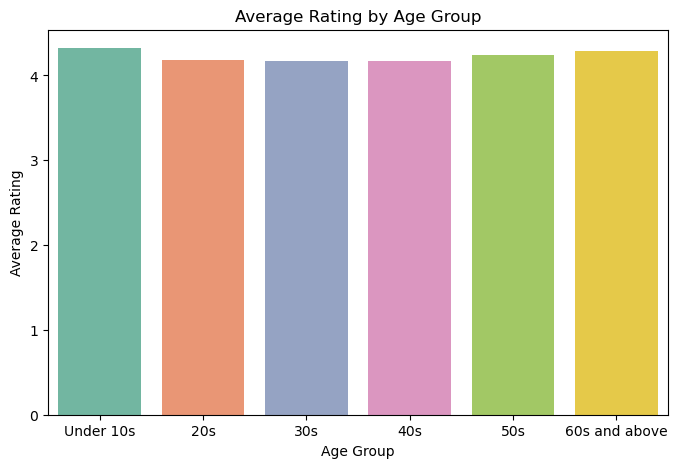

In [33]:
# 연령을 10살 단위로 나눠서 연령대 생성
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['Under 10s', '20s', '30s', '40s', '50s', '60s and above'])

# 연령대별 평균 평점 계산
age_rating = df.groupby('Age Group')['Rating'].mean()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=age_rating.index, y=age_rating.values, palette='Set2')
plt.title('Average Rating by Age Group')
plt.ylabel('Average Rating')
plt.xlabel('Age Group')
plt.show()

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\1601327699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='pastel')


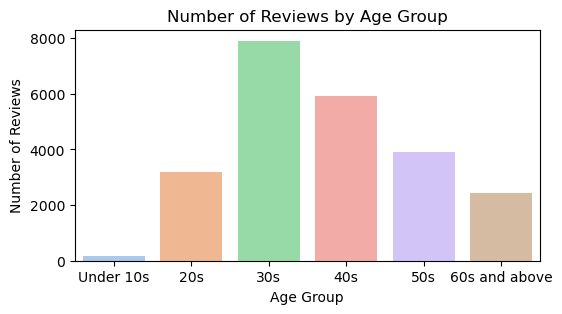

In [37]:
#위 실습 응용문제
#(1) - 연령대별 리뷰 수는 어떻게 되는가?

#연령대별 리뷰 수(즉, 각 연령대가 남긴 리뷰 개수)를 확인
age_counts = df['Age Group'].value_counts().sort_index()
#시각화
plt.figure(figsize=(6, 3))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='pastel')
plt.title('Number of Reviews by Age Group')  
plt.xlabel('Age Group')                     
plt.ylabel('Number of Reviews')              
plt.show()

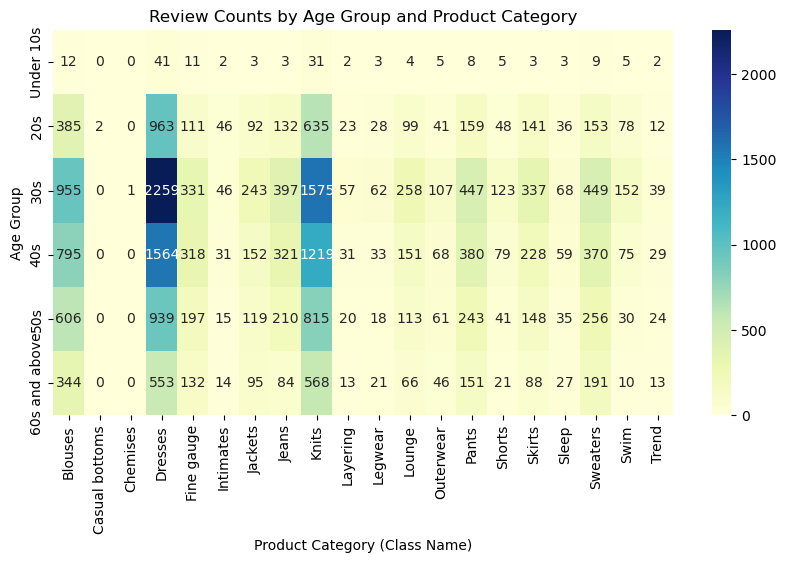

In [43]:
#(2) - 특정 연령대는 특정 상품군(Class Name)에 선호하는가?

#연령대와 상품군을 교차표로 확인
age_class_crosstab = pd.crosstab(df['Age Group'], df['Class Name'])

#(heatmap)시각화
# 참고 : heatmap그릴 때 [DateFrame(table), cmap(색상옵션), annnot=True(셀 바로 확인 옵션), "True"옵션을 켰을 시 fmt(숫자형태)순으로 입력]
plt.figure(figsize=(10,5))
sns.heatmap(age_class_crosstab, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Review Counts by Age Group and Product Category') 
plt.xlabel('Product Category (Class Name)')                 
plt.ylabel('Age Group')                                      
plt.show()

#무엇을 어떻게 확인해볼 수 있는건지 잘 모르겠다
#30대 사람들이 Dresses에 리뷰를 2259를 제일 많이 달았다?  

In [51]:
#(3) - 평균 평점은 높지만 리뷰 수가 적은 연령대는?

#평균 평점
avg_rating = df.groupby('Age Group')['Rating'].mean()

#리뷰 수
review_counts = df['Age Group'].value_counts()

#둘을 합쳐서 하나의 DateFrame으로 보가
summary_df = pd.DataFrame({'Avg_Rating' : avg_rating, 'Review_Counts' : review_counts}).sort_values('Average Rating', ascending=False)
summary_df

# 결과 : (10대 이하)리뷰수는 적지만 평균 평점이 높기 때문에 더 많은 참여를 유도할 대상의 가치가 높음(리뷰 이벤트 타겟)

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\4263374392.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating = df.groupby('Age Group')['Rating'].mean()


,평균 평점,리뷰 수
Age Group,,
Under 10s,4.322368,152
60s and above,4.287238,2437
50s,4.245758,3890
20s,4.185616,3184
30s,4.166203,7906
40s,4.166017,5903


C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\3431766125.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_ratio = df.groupby('Age Group')['Positive Review'].mean()
C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\3431766125.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_ratio.index, y=positive_ratio.values, palette='Set3')


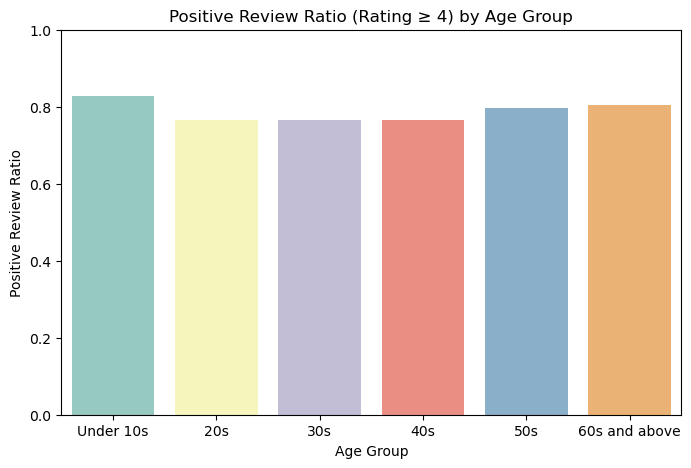

In [55]:
#(4) - 4점 이상을 긍정적 리뷰로 가정하고, 긍정 비율 계산
df['긍정리뷰여부'] = df['Rating'] >= 4  

# 컬럼명을 영어로 바꿔 저장
df['Positive Review'] = df['긍정리뷰여부']   # ← 영어로 복사
df.drop(columns=['긍정리뷰여부'], inplace=True)

# 연령대별 긍정리뷰 비율 계산
positive_ratio = df.groupby('Age Group')['Positive Review'].mean()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=positive_ratio.index, y=positive_ratio.values, palette='Set3')
plt.title('Positive Review Ratio (Rating ≥ 4) by Age Group')   
plt.xlabel('Age Group')                                       
plt.ylabel('Positive Review Ratio')                        
plt.ylim(0, 1)
plt.show()

# 결과 : "만족한 사람의 비율"확인 / 단순 평점보다도, 4점 이상(긍정적인 평가)가 몇 %인지 볼수있음("만족도 높은 핵심 타겟")

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\3341489910.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_std = df.groupby('Age Group')['Rating'].std()
C:\Users\ghfkd\AppData\Local\Temp\ipykernel_21360\3341489910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_std.index, y=rating_std.values, palette='coolwarm')


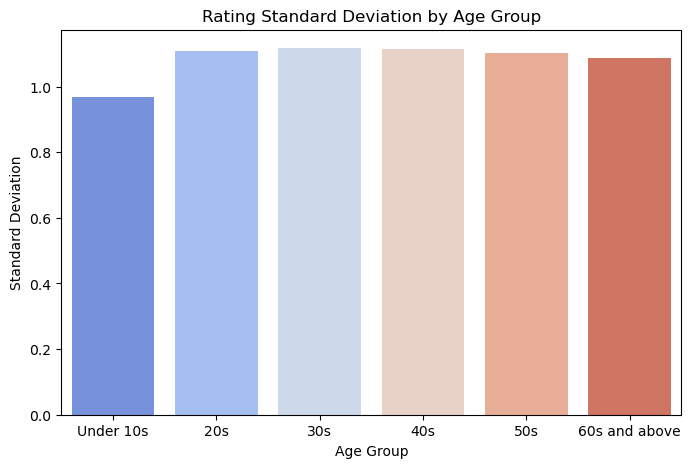

In [57]:
#(5) - 연령대별 평점 분산은 어떤가?
# 연령대별 평점 분산 계산
rating_std = df.groupby('Age Group')['Rating'].std()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_std.index, y=rating_std.values, palette='coolwarm')
plt.title('Rating Standard Deviation by Age Group')  
plt.xlabel('Age Group')                              
plt.ylabel('Standard Deviation')                     
plt.show()

# 결과 : 연령대별 평점의 분산이 크면, 동일 제품을 보고도 의견이 엇갈린다는 의미
# - '호불호'가 강할 수도 있고 리뷰 보완 자료 제공 전략 및 상품 설명 강화 대응에 활용

In [5]:
# 1. 특정 카테고리 추출 (캐주얼 하의)
casual_bottoms_df = df[df['Class Name'] == 'Casual bottoms']

In [7]:
# 2. 필요시 타입 강제 DataFrame (사실 이 라인은 거의 생략 가능)
casual_bottoms_df = pd.DataFrame(casual_bottoms_df)

In [9]:
# 3. 컬럼 확인
print(casual_bottoms_df.columns)

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [11]:
# 4. 결측치 제거 (Positive Feedback Count에 NaN 있으면 astype 오류남)
casual_bottoms_df = casual_bottoms_df.dropna(subset=['Positive Feedback Count'])

In [13]:
# 5. 데이터 타입 변환
casual_bottoms_df['Positive Feedback Count'] = casual_bottoms_df['Positive Feedback Count'].astype(int)

In [15]:
# 6. 확인
print(casual_bottoms_df['Positive Feedback Count'].dtypes)

int32


In [17]:
#참고 : 위쪽에서 결측치 제거를 안했을 경우에 한번도 실행해서 결측치가 있는지 확인하기
print(casual_bottoms_df['Positive Feedback Count'].isnull().sum())

0


In [19]:
# 필터링 먼저
casual_bottoms_df = df[df['Class Name'] == 'Casual bottoms'].copy()

# Age Group 다시 만들어줌
casual_bottoms_df['Age Group'] = pd.cut(
    casual_bottoms_df['Age'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['Under 10s', '20s', '30s', '40s', '50s', '60s+']
)


In [21]:
# Positive Review 컬럼 다시 생성
casual_bottoms_df['Positive Review'] = casual_bottoms_df['Rating'] >= 4

C:\Users\ghfkd\AppData\Local\Temp\ipykernel_2040\1348104714.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casual_positive = casual_bottoms_df.groupby('Age Group')['Positive Review'].mean()
C:\Users\ghfkd\AppData\Local\Temp\ipykernel_2040\1348104714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casual_positive.index, y=casual_positive.values, palette='cool')


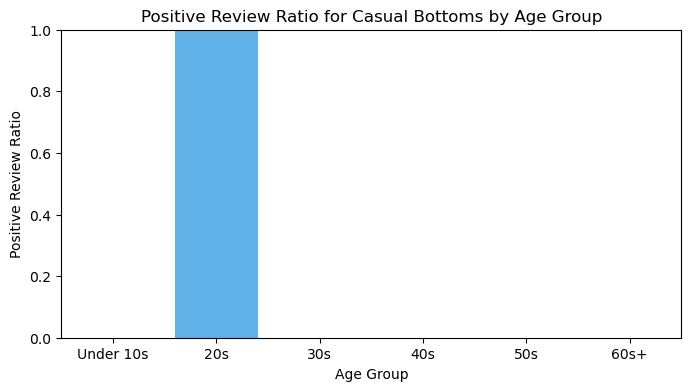

In [23]:
# 연령대별 긍정 리뷰 비율 계산
casual_positive = casual_bottoms_df.groupby('Age Group')['Positive Review'].mean()

# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(x=casual_positive.index, y=casual_positive.values, palette='cool')
plt.title('Positive Review Ratio for Casual Bottoms by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Positive Review Ratio')
plt.ylim(0, 1)
plt.show()

In [25]:
casual_positive_df = casual_positive.reset_index()
casual_positive_df.columns = ['Age Group', 'Positive Review Ratio']
casual_positive_df['Review Count'] = casual_bottoms_df['Age Group'].value_counts().reindex(casual_positive.index)

# NaN 발생 이유를 같이 출력하거나 주석으로 정리
print(casual_positive_df)

   Age Group  Positive Review Ratio  Review Count
0  Under 10s                    NaN           NaN
1        20s                    1.0           NaN
2        30s                    NaN           NaN
3        40s                    NaN           NaN
4        50s                    NaN           NaN
5       60s+                    NaN           NaN


In [27]:
# 긍정 리뷰 건수
pos_review_count = casual_bottoms_df[casual_bottoms_df['Positive Review']].groupby('Age Group').size()

# 하나의 데이터프레임으로 통합
combined_df = pd.DataFrame({
    'Positive Review Ratio': casual_positive,
    'Positive Review Count': pos_review_count
}).fillna(0)

print(combined_df.sort_values('Positive Review Count', ascending=False))

# 결과 : 20대는 비율도 높고, 건수도 많다 -> 타겟층

           Positive Review Ratio  Positive Review Count
Age Group                                              
20s                          1.0                      2
Under 10s                    0.0                      0
30s                          0.0                      0
40s                          0.0                      0
50s                          0.0                      0
60s+                         0.0                      0


C:\Users\ghfkd\AppData\Local\Temp\ipykernel_2040\4134883456.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_review_count = casual_bottoms_df[casual_bottoms_df['Positive Review']].groupby('Age Group').size()


- 캐주얼 하의에 대한 긍정적 반응은 20대에서 가장 높고 리뷰 수도 많음.

- 30대 이상은 캐주얼 하의 리뷰가 거의 없어, 이 제품군에 큰 관심이 없을 가능성이 있음.

- 마케팅 타겟: 20대 여성 중심으로 설정 추천.